# Introduction

This dataset involved British Airways' passenger reviews and ratings, gathered from skytrax website. The data is a comprehensive source of information regarding client experiences, spanning 385 pages of user-generated content. Each entry in the dataset includes multiple aspects of the flight experience, flight Information, recommendation whether the reviewer would recommend British Airways to others. By reviewing this data, we can understand that whether the passengers would likely to recommend others or not which we can also understand the rise in sales. Moreover, this dataset is vital to for the business and ablie to analyze the client preferences, highlighting areas in need of development, and knowing customer satisfaction.


Original Source : https://www.kaggle.com/datasets/yaranathakur/british-airways-reviews/data

# Dataset Overview

Column Descriptions:

*Features*

1. reviewer_detail: includes reviewer name, loacation and date
2. reviews: provided by the passenger
3. Food_&_Beverages: the quality of food and beverages offered during the flight (0 least - 5 most).
4. Inflight_Entertainment: rating (0 least - 5 most)
5. Seat_Comfort: rating (0 least - 5 most)
6. Type_Of_Traveller: such as solo, family, business.
7. Seat_Type: (e.g., economy, business class).
8. Route: The route taken by the passenger
9. Date_Flown: The date on which the passenger flew.
10. Cabin_Staff_Service: rating (0 least - 5 most) for the service provided by the cabin staff.
11. Ground_Service: rating (0 least - 5 most) for the service provided by ground staff.
12. Wifi_&_Connectivity: rating (0 least - 5 most) for the wifi and connectivity options.
13. Value_For_Money: rating (0 least - 5 most) reflecting the passenger's perception of the overall value for money, considering the quality of service received relative to the cost of the flight.
14. Aircraft: type of aircraft

*Target*

16. Recommended: Whether the passenger would recommend British Airways (Yes/No).

# Business Questions

1. What are the key factors that influence customer satisfaction for airline services?
2. Which seat types are most commonly selected by passengers, and how can the airline enhance their experience?
3. Which feature is necessary to improve in order to recommend to others?
4. What factors contributed to passengers purchasing airline tickets in 2015 than other years?




# Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [93]:
df_org = pd.read_csv("BA-Final-Data-Skytrax.csv")

## Data Preprocessing

In [94]:
print(df_org.shape)

(3850, 18)


In [95]:
df_org.head(7)

,Unnamed: 0,reviewer_detail,reviews,Food & Beverages,Inflight Entertainment,Seat Comfort,Staff Service,Value for Money,Type Of Traveller,Seat Type,Route,Date Flown,Cabin Staff Service,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
0,0,Amanda Edgar(United Kingdom)2nd September 2024,✅Trip Verified| As someone who flies relentles...,1.0,1.0,2.0,NaN,NaN,Couple Leisure,Business Class,London to Crete,September 2024,1.0,2.0,3.0,2.0,no,NaN
1,1,S Morton(United Kingdom)1st September 2024,✅Trip Verified| Flew with British Airways cl...,3.0,NaN,3.0,NaN,NaN,Business,Business Class,Berlin to London,August 2024,1.0,1.0,NaN,1.0,no,A319
2,2,E Smyth(United Kingdom)30th August 2024,✅Trip Verified| Straightforward check in T5....,4.0,5.0,4.0,NaN,NaN,Family Leisure,Business Class,London to Toronto,August 2024,4.0,4.0,5.0,4.0,yes,Boeing 777-200
3,3,Lauren Boniface(United Kingdom)28th August 2024,Not Verified| I am beyond upset and disgusted ...,NaN,NaN,1.0,NaN,NaN,Solo Leisure,Economy Class,London to Denver,August 2024,1.0,1.0,NaN,1.0,no,NaN
4,4,Il Yong Jung(Hong Kong)28th August 2024,✅Trip Verified| I purchased round trip direc...,3.0,4.0,4.0,NaN,NaN,Family Leisure,Business Class,London to Hong Kong via Doha,July 2024,1.0,1.0,4.0,1.0,no,NaN
5,5,Raymond Fournier(United States)27th August 2024,Not Verified| I booked two business class seat...,NaN,NaN,NaN,NaN,NaN,Business,Business Class,San Diego to Athens,August 2024,NaN,NaN,NaN,1.0,no,NaN
6,6,Arthur Grace(United Kingdom)26th August 2024,Not Verified| Although all four flights were d...,4.0,4.0,5.0,NaN,NaN,Solo Leisure,First Class,Manchester to Newark via London,August 2024,5.0,4.0,3.0,5.0,yes,Boeing 787


In [96]:
df = df_org.copy()

# Data Cleaning

In [97]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3850.0,NaN,NaN,NaN,1924.5,1111.543596,0.0,962.25,1924.5,2886.75,3849.0
reviewer_detail,3850,3663,Alistair Baker(United Kingdom)31st May 2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews,3850,3775,Flew from London Heathrow to Rome Fiumicino. F...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food & Beverages,3428.0,NaN,NaN,NaN,2.717328,1.436842,0.0,1.0,3.0,4.0,5.0
Inflight Entertainment,2637.0,NaN,NaN,NaN,2.659841,1.402615,0.0,1.0,3.0,4.0,5.0
Seat Comfort,3727.0,NaN,NaN,NaN,2.870673,1.364537,1.0,2.0,3.0,4.0,5.0
Staff Service,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value for Money,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type Of Traveller,3084,4,Couple Leisure,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat Type,3849,4,Economy Class,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
(100* df.isnull().sum()/len(df)).sort_values()

,0
Unnamed: 0,0.000000
reviewer_detail,0.000000
reviews,0.000000
Value For Money,0.000000
Recommended,0.000000
Seat Type,0.025974
Seat Comfort,3.194805
Cabin Staff Service,3.558442
Food & Beverages,10.961039
Type Of Traveller,19.896104


*   Dropping duplicate column



In [99]:
df = df.drop(columns = ["Unnamed: 0"], axis = 1)

* Removing 'Staff Service', 'Value for Money' columns, as the data shows the 100% missing value.

In [100]:
df.drop(columns=['Staff Service', 'Value for Money'], axis = 1, inplace = True)

* Substituting '0.0' value as below columns are missing data less than 5%.

In [101]:
missing_columns = ["Seat Comfort", "Cabin Staff Service", "Food & Beverages"]

In [102]:
df[missing_columns] = df[missing_columns].fillna(0.0)

* Dropping value for 'wifi and connectivity'

In [103]:
df = df.drop(columns = ['Wifi & Connectivity'], axis = 1)


* 'Seat Type' column is significantly low which means there is only 1 row as missing value. So, by taking out the 1 entry in that column, we can clear the missing data.

In [104]:
df = df.dropna(axis=0, subset=["Seat Type"])

* Dropping "aircraft" features, since data is missing for 47%.

In [105]:
df.drop(columns=['Aircraft'], axis = 1, inplace = True)

* Filling missing values with the previous valid value under 'Type of Traveller' columns to clear out the missing data.



In [106]:
df["Type Of Traveller"] = df["Type Of Traveller"].fillna(method = 'ffill')

<ipython-input-106-99e6e6a13aff>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Type Of Traveller"] = df["Type Of Traveller"].fillna(method = 'ffill')


In [107]:
df["Type Of Traveller"].value_counts()

,count
Type Of Traveller,
Family Leisure,1190
Couple Leisure,1045
Solo Leisure,945
Business,669


* Replacing "Not Specified" for missing data under "Route" column.




In [108]:
df["Route"] = df["Route"].fillna("Not Specified")

* Substituting with the most frequent value for Inflight Entertainment, Ground Service and Date Flown columns

In [109]:
df['Inflight Entertainment'] = df['Inflight Entertainment'].fillna(df['Inflight Entertainment'].mode()[0])

In [110]:
df['Ground Service'] = df['Ground Service'].fillna(df['Ground Service'].mode()[0])

In [111]:
df['Date Flown'] = df['Date Flown'].fillna(df['Date Flown'].mode()[0])

In [112]:
df.isnull().sum().sort_values()

,0
reviewer_detail,0
reviews,0
Food & Beverages,0
Inflight Entertainment,0
Seat Comfort,0
Type Of Traveller,0
Seat Type,0
Route,0
Date Flown,0
Cabin Staff Service,0


In [113]:
if df.isna().sum().sum() == 0:
  print('The dataset is clean.')


The dataset is clean.


# **Exploratory Data Analysis (EDA)**

---



* As per below table, describing statistics for numerical columns, we can see that:

Based of the below ratings which range from 0 to 5, the 'Cabin Staff Service' shows a high mean value, indicating that this service has positive value from passengers wheras 'Food & Beverages' service shows low mean value reflecting relatively lower customer satisfaction in this area.

* Regarding recommendation area, the average recommendation score is 0.404, indicating that around 40.4% of users recommended the service.





In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Food & Beverages,3849.0,2.419330,1.599864,0.0,1.0,2.0,4.0,5.0
Inflight Entertainment,3849.0,2.136919,1.393746,0.0,1.0,1.0,3.0,5.0
Seat Comfort,3849.0,2.779423,1.434260,0.0,1.0,3.0,4.0,5.0
Cabin Staff Service,3849.0,3.132502,1.585277,0.0,2.0,3.0,5.0,5.0
Ground Service,3849.0,2.378540,1.483403,1.0,1.0,2.0,4.0,5.0
Value For Money,3849.0,2.680436,1.473513,0.0,1.0,3.0,4.0,5.0


* Replacing categorical value to numerical for 'Recommended' column

In [115]:
df['Recommended'] = df['Recommended'].apply(lambda x: 1 if x == 'yes' else 0)

<Axes: xlabel='Recommended', ylabel='count'>

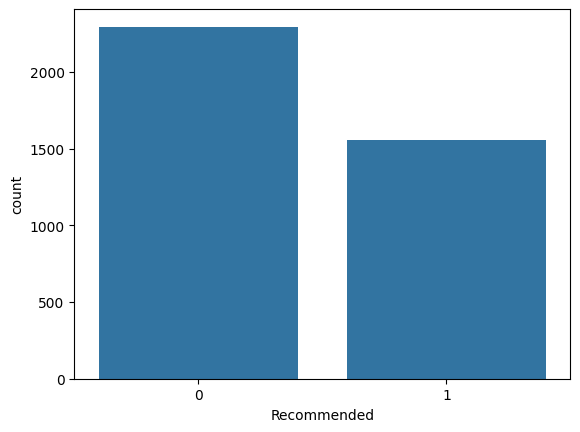

In [116]:
sns.countplot(data =df, x = 'Recommended')

* Dropping the reviewer details columns and extract to 'reviewer_name',	'review_place' and 'review_date'

In [117]:
df["reviewer_name"] = df["reviewer_detail"].str.split("(", expand=True)[0]
df["review_place"] = df["reviewer_detail"].str.extract(r"\((.*?)\)")[0]
df["review_date"] = df["reviewer_detail"].str.split(")", expand=True)[1]

df.drop(columns=["reviewer_detail"], inplace=True)

In [118]:
df.sample()

,reviews,Food & Beverages,Inflight Entertainment,Seat Comfort,Type Of Traveller,Seat Type,Route,Date Flown,Cabin Staff Service,Ground Service,Value For Money,Recommended,reviewer_name,review_place,review_date
310,✅Trip Verified| \r\nThe flights were all on t...,3.0,1.0,1.0,Solo Leisure,Economy Class,London to Belfast,May 2023,3.0,1.0,1.0,0,Richard Cruise,United Kingdom,17th May 2023


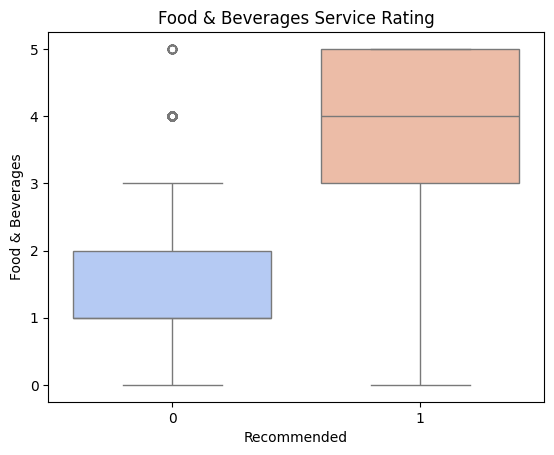

In [119]:
sns.boxplot(x='Recommended', y ='Food & Beverages', data =df, palette = 'coolwarm', hue = 'Recommended', legend = False)
plt.title('Food & Beverages Service Rating')
plt.show()

The above boxplot describes that good service in Food & Beverages is vital to recommend to others, however, there may be some outliers.

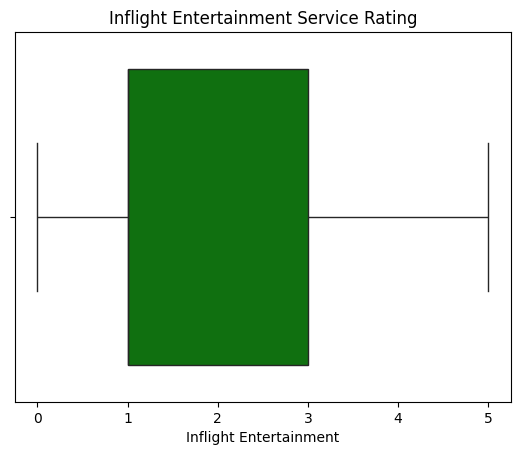

In [120]:
sns.boxplot(x='Inflight Entertainment', data = df, color = 'green')
plt.title('Inflight Entertainment Service Rating');

Additionally, the above figure shows that inflight entertainment serive is in moderate level of customer satisfaction for British Airways.



## Correlation Heatmap

The below correlation heatmap indicates that the relationships between different airline services and overall customer recommendations. The highest correlation with "Recommended" can be found in "Value for Money" (0.8), followed by "Food & Beverages" (0.67) and "Cabin Staff Service" (0.66), showing that these factors significantly impact customer satisfaction and recommendation.

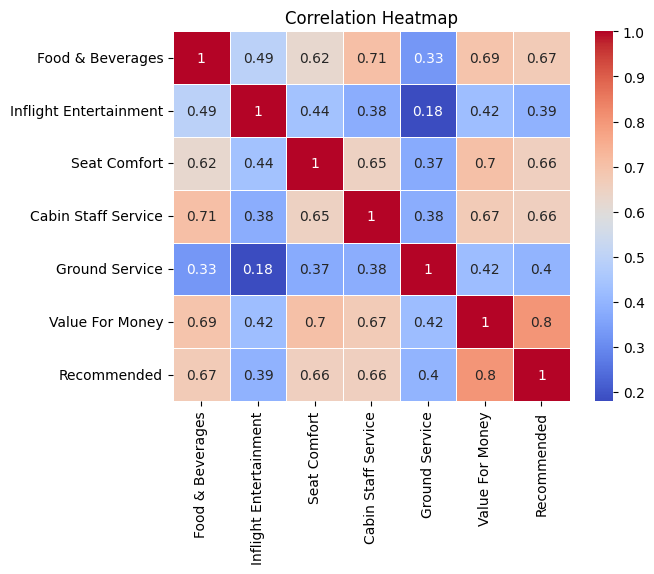

In [121]:
sns.heatmap(df.corr(numeric_only = True), annot=True, linewidths=0.5, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [122]:
traveler_distribution = df['Type Of Traveller'].value_counts()

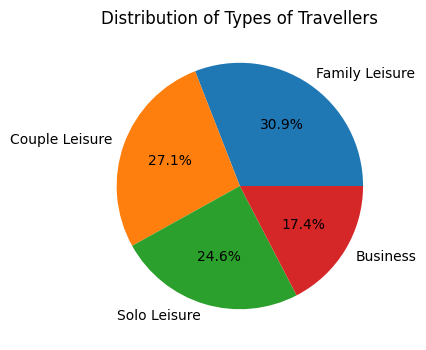

In [123]:
plt.figure(figsize=(6, 4))
traveler_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Types of Travellers')
plt.ylabel('')
plt.show()

In [124]:
df['review_place'].value_counts().head(10)

,count
review_place,
United Kingdom,2413
United States,442
Australia,158
Canada,124
Germany,66
South Africa,42
Ireland,39
Switzerland,39
Netherlands,36


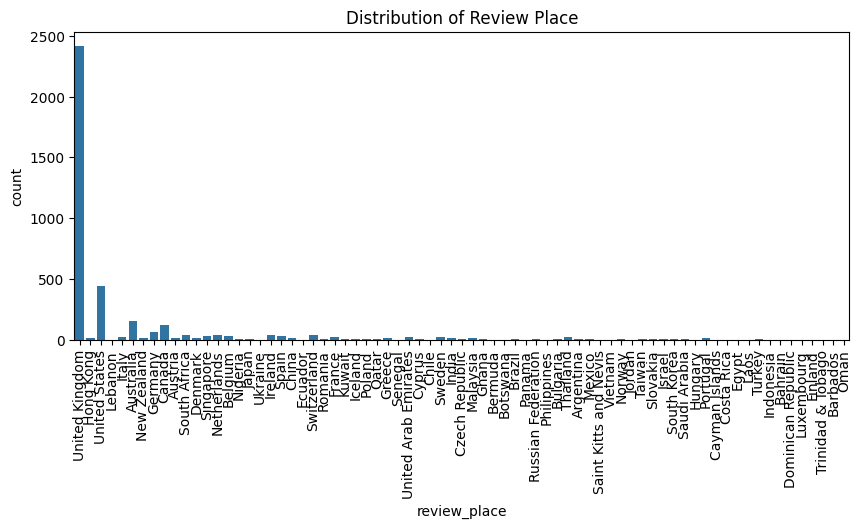

In [125]:
plt.figure(figsize=(10, 4))
sns.countplot(x = 'review_place', data = df)
plt.xticks(rotation=90)
plt.title('Distribution of Review Place')
plt.show()

* We can see from the above figure is that most of the passengers who provide the recommendation are from 'United Kingdom' followed by those from the United States.

# Answering Business Questions

***Q1. What are the key factors that influence customer satisfaction for airline services?***

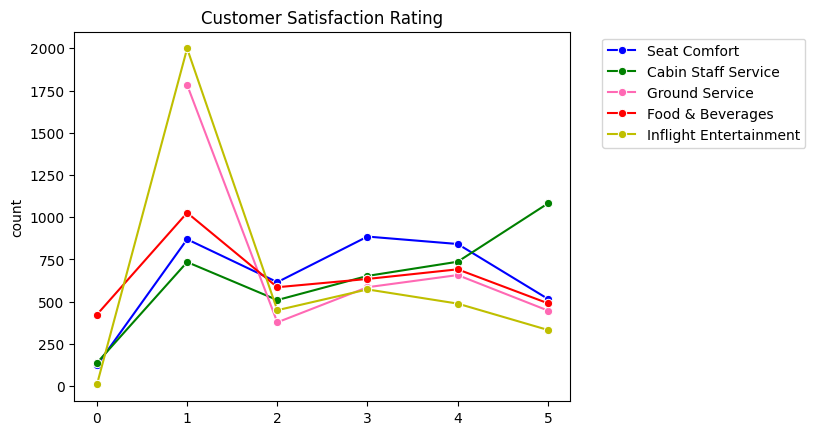

In [126]:
sns.lineplot(x=df['Seat Comfort'].value_counts().index.to_list(), y=df['Seat Comfort'].value_counts(), marker='o', color='b', label='Seat Comfort')
sns.lineplot(x=df['Cabin Staff Service'].value_counts().index.to_list(), y=df['Cabin Staff Service'].value_counts(), marker='o', color='g', label='Cabin Staff Service')
sns.lineplot(x=df['Ground Service'].value_counts().index.to_list(), y=df['Ground Service'].value_counts(), marker='o', color='hotpink', label='Ground Service')
sns.lineplot(x=df['Food & Beverages'].value_counts().index.to_list(), y=df['Food & Beverages'].value_counts(), marker='o', color='r', label='Food & Beverages')
sns.lineplot(x=df['Inflight Entertainment'].value_counts().index.to_list(), y=df['Inflight Entertainment'].value_counts(), marker='o', color='y', label='Inflight Entertainment')
plt.title('Customer Satisfaction Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

A1. We can analyze the facts that influence customer satisfaction by above lineplot. For the services of ground service and food & beverages, the rating for them is below average which are not as good as other srvices. Whereas seat comfort service shows better service compare to food & Beverages and ground service.
Regarding cabin staff service, we can observe that few passengers rate (0-2) rating, however, there are above 1000 passengers who rate for 5. Therefore, we can understand that **Inflight Entertainment** has greater influence on customer satisfaction.



---



***Q2. Which seat types are most commonly selected by passengers, and how can the airline enhance their experience?***


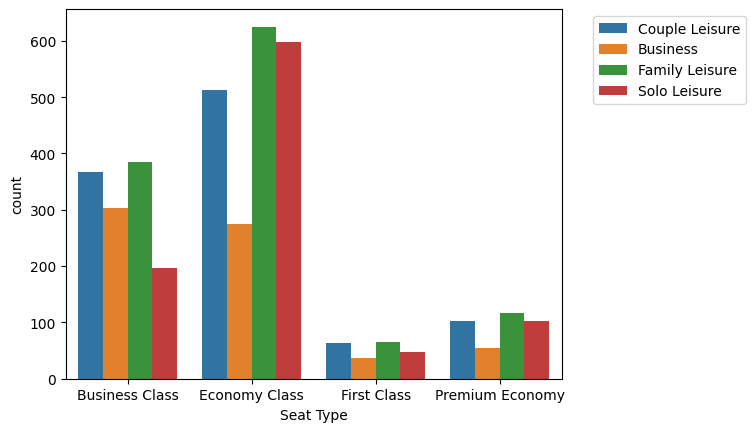

In [127]:
sns.countplot(data = df, x = 'Seat Type', hue = 'Type Of Traveller')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

<Axes: xlabel='Type Of Traveller', ylabel='count'>

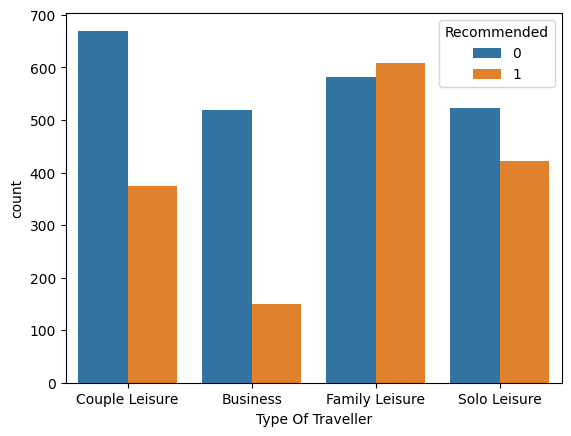

In [128]:
sns.countplot(data = df, x = 'Type Of Traveller', hue = 'Recommended')

A2. According to the figure, it can be seen that ‘First Class’ seat type is not the best to choose by all travelers whereas ‘Economy’ class is the most commonly selected by travelers of Family Leisure and Solo Leisure. However, ‘First Class’ and ‘Premium Economy’ have the lowest number of travelers among all traveler types. In order to develop the airline experience, airline can introduce premium economy options with priority boarding or corporate discounts to attract the travelers.



---



**Q3. Which feature is necessary to improve in order to recommend to others?**

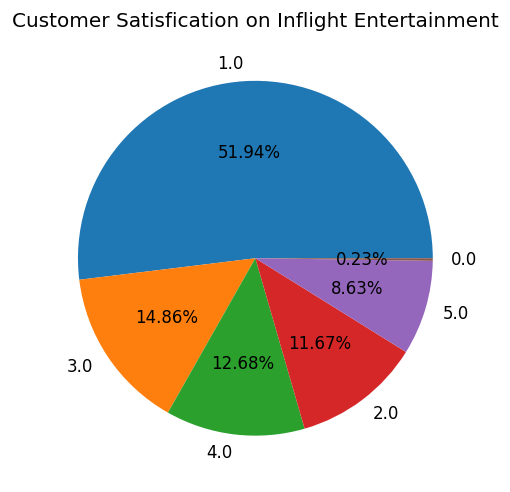

In [129]:
plt.figure(dpi=120)
plt.pie(df['Inflight Entertainment'].value_counts(), labels=df['Inflight Entertainment'].value_counts().index.to_list(), autopct='%.2f%%');
plt.title('Customer Satisfication on Inflight Entertainment')
plt.show()

A3. The above piechart illustrates the Customer Satisfaction on Inflight Entertainment with ratings from 0-5. As shown in above pie chart, it is significantly clear that the majority of customer (51.94%) rated 1 on 'Inflight Entertainment' service, which means many customers were dissatisfied with the service. We can be understand that by improving inflight entertainment service could develop overall customer satisfaction and increase recommendations.



---



***Q4. What factors contributed to passengers purchasing airline tickets in 2015 than other years?***

In [130]:
def extract_year(x):
    x = str(x)
    return x[-4:]

In [131]:
df['Year Flown'] = df['Date Flown'].apply(extract_year)

In [132]:
round(df['Year Flown'].value_counts() / len(df) * 100)

,count
Year Flown,
2015,32.0
2016,15.0
2017,15.0
2018,9.0
2019,9.0
2023,7.0
2022,6.0
2024,3.0
2020,2.0


<Axes: ylabel='count'>

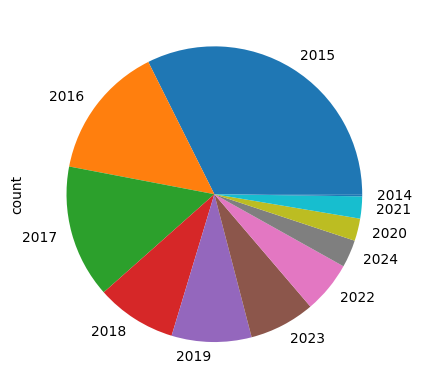

In [133]:
df['Year Flown'].value_counts().plot(kind="pie")

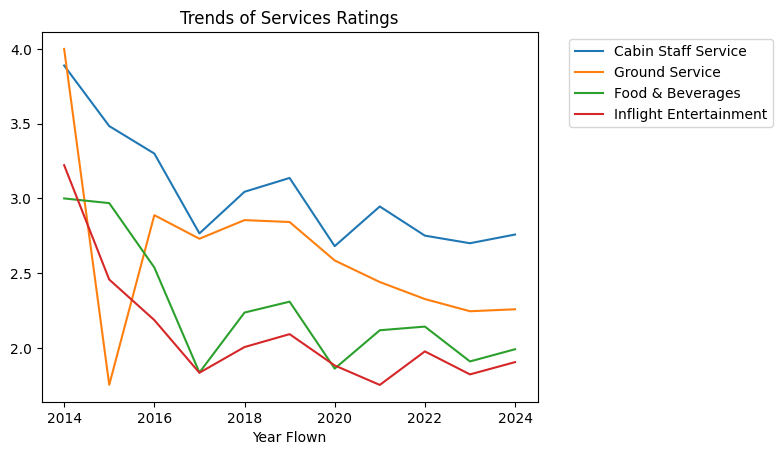

In [134]:
df.groupby('Year Flown')[['Cabin Staff Service', 'Ground Service', 'Food & Beverages', 'Inflight Entertainment']].mean().plot()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Trends of Services Ratings')
plt.show()

A4. The above figure shows the trends of airline services ratings for 10 years. According to the graph, all service categories received the highest rating between 2014 and 2015 when compared to later years. This suggests that several factors could have contributed to more passengers purchasing airline tickets in 2015, including:
* Better Quality of Service: Higher ratings for Cabin Staff Service and Inflight Entertainment in 2015 indicate that customer experience was at its greatest and potentially attracting more customers.
* Better Ground Services: In 2015, passengers may have had check-in conveniently for example, baggage handling, and boarding process, making travel smoothly.
* Higher Customer Satisfaction with Food & Beverages: The decreasing in ratings after 2015 suggests that passengers may have been more satisfied with in-flight meals back then, influencing their purchase decisions.

**Q5. How does the perception of "Value for Money" influence a passenger's likelihood to recommend the airline?**

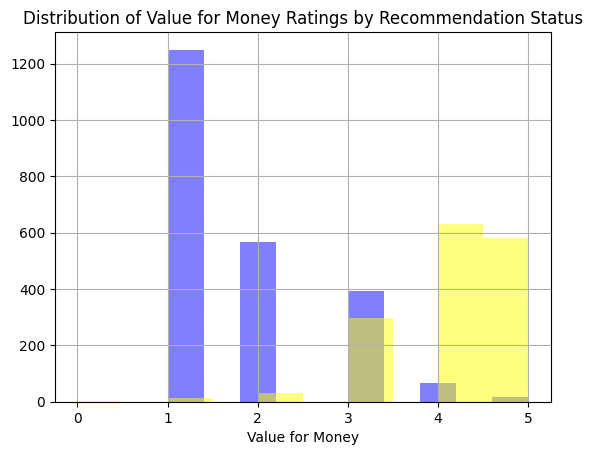

In [135]:
df[df['Recommended']==0]['Value For Money'].hist(alpha = 0.5, color = 'blue')
df[df['Recommended']==1]['Value For Money'].hist(alpha = 0.5, color = 'yellow')

plt.title('Distribution of Value for Money Ratings by Recommendation Status')
plt.xlabel('Value for Money')

plt.show()



A5.Passenger recommendations and Value for Money evaluations are strongly correlated, according to the histogram. The majority of passengers who gave the airline a Value for Money rating of 1 or 2 expressed disappointment by not recommending it.
On the other hand, travelers who rated the airline a 4 or a 5 were more likely to suggest it to others.
This implies that raising the perception of value for money—by improving services, reducing expenses, or providing better promotions—could increase customers happiness and encourage favorable referrals, which is likely to enhance brand recognition and client retention.

## Conclusion

To be concluded, this study explores British Airways customer reviews to identify main factors that impacts customer satisfactions and recommending to others. Comfortable seat, food, inflight entertainment and cabin staff service lead to positive feedback. However, economy class passengers are not very satisfied with comfortable seat and value for money.

Business class travelers and solo travelers provide higher ratings, whereas economy class passengers express dissatisfaction, particularly with seat comfort and value for money. Additionally, service gaps such as weak ground services and poor wifi& connectivity contribute to low ratings and customer dissatisfaction.

To improve customer satisfaction, British Airways should focus on upgrade comfort, enhance WiFi and connectivity, train staff for better service, and use customer feedback for personalized offers. Additional elements like ticket costs, flight schedules, and competitor comparisons should be included in future studies to provide a more thorough understanding of consumer preferences and potential areas for development.




